In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataset = pd.read_csv('dataset/Zameen Property Data.csv')

In [10]:
from pre_poccess import pre_poccess
data = pre_poccess(dataset)
data.head(5)

145742


C:\Users\Huda\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Huda\OneDrive - Habib University\semester 7\Data Science\project\Zameen-Data-exploratory-Analysis\pre_poccess.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['price_z_score'][dataset['purpose'] == 'For Sale'] = z_score


141985
pre-poccessed successfully.


C:\Users\Huda\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Huda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Huda\OneDrive - Habib University\semester 7\Data Science\project\Zameen-Data-exploratory-Analysis\pre_poccess.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,unique_location,price_per_area,price_z_score
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,2000.0,For Sale,2,02-04-2019,Individual,G-10 Islamabad,5000.000000,-0.363829
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,2800.0,For Sale,3,05-04-2019,Individual,E-11 Islamabad,2464.285714,-0.366420
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,4000.0,For Sale,5,07-17-2019,Individual,G-15 Islamabad,4125.000000,-0.364723
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,50.0,For Sale,4,04-05-2019,Individual,Bani Gala Islamabad,870000.000000,0.519814
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,4000.0,For Sale,3,07-10-2019,Easy Property,DHA Defence Islamabad,1750.000000,-0.367149


In [15]:
data.drop(['price_per_area','price_z_score'], axis=1, inplace=True)
data_null = data.isna().sum()
print(data_null)

property_type      0
price              0
location           0
city               0
province_name      0
latitude           0
longitude          0
baths              0
area               0
purpose            0
bedrooms           0
date_added         0
agency             0
unique_location    0
dtype: int64


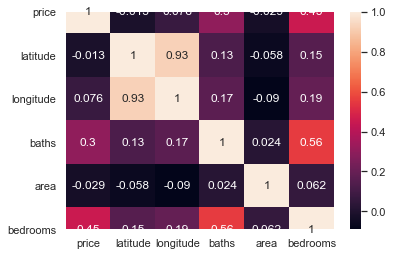

In [16]:
plt.figure()
sns.set(font_scale=1)
sns.heatmap(data.corr(),annot=True);

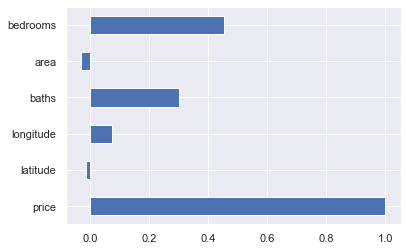

In [17]:
plt.figure()
data.corr()['price'].plot(kind='barh');

In [18]:
numer = set(data.corr()['price'].index)
categ = list(set(data.columns) - set(data.corr()['price'].index))
print('numerical: ',numer)
print('categorical: ',categ)

numerical:  {'bedrooms', 'area', 'price', 'latitude', 'longitude', 'baths'}
categorical:  ['property_type', 'date_added', 'agency', 'province_name', 'unique_location', 'location', 'purpose', 'city']


Converting categorical data into a numerical: ecoding using factorize

In [19]:
data_targ = data.copy()
for i in categ:
    data_targ[i] = data_targ[i].factorize()[0]
data_targ.head(5)

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,unique_location
0,0,10000000,0,0,0,33.679890,73.012640,2,2000.0,0,2,0,0,0
1,0,6900000,1,0,0,33.700993,72.971492,3,2800.0,0,3,1,0,1
2,1,16500000,2,0,0,33.631486,72.926559,6,4000.0,0,5,2,0,2
3,1,43500000,3,0,0,33.707573,73.151199,4,50.0,0,4,3,0,3
4,1,7000000,4,0,0,33.492591,73.301339,3,4000.0,0,3,4,1,4


In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler, RobustScaler
data_targ.drop(['price'],axis=1,inplace=True)
nrm = Normalizer()
nrm.fit(data_targ)
normal_data = nrm.transform(data_targ)

In [40]:
data_focus = data[['price','area', 'bedrooms']]

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_focus)
y_kmeans = kmeans.predict(data_focus)

In [43]:
plt.scatter(data_focus[:, 0], data_focus[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [45]:
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(data_focus)
 
print(label)

[0 0 2 ... 2 2 0]


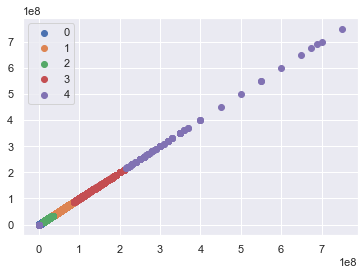

In [51]:
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(data_focus[label == i] , data_focus[label == i] , label = i)
plt.legend()
plt.show()